In [239]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Input, GlobalMaxPooling1D
from tensorflow.keras.models import Model
import cv2

In [240]:
labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt",
          "Sneaker","Bag","Ankle boot"]

In [241]:
df = pd.read_csv("data/fashion-mnist_test.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [242]:
df.shape

(10000, 785)

In [243]:
y = df['label']
X = df.drop(['label'],axis = 1)
X1 = np.array(X)
n_samples = len(df.index)
images = X1.reshape(n_samples,28,28)
images = images.astype('float64')

images /= 255.
# images = np.expand_dims(images, axis=3)

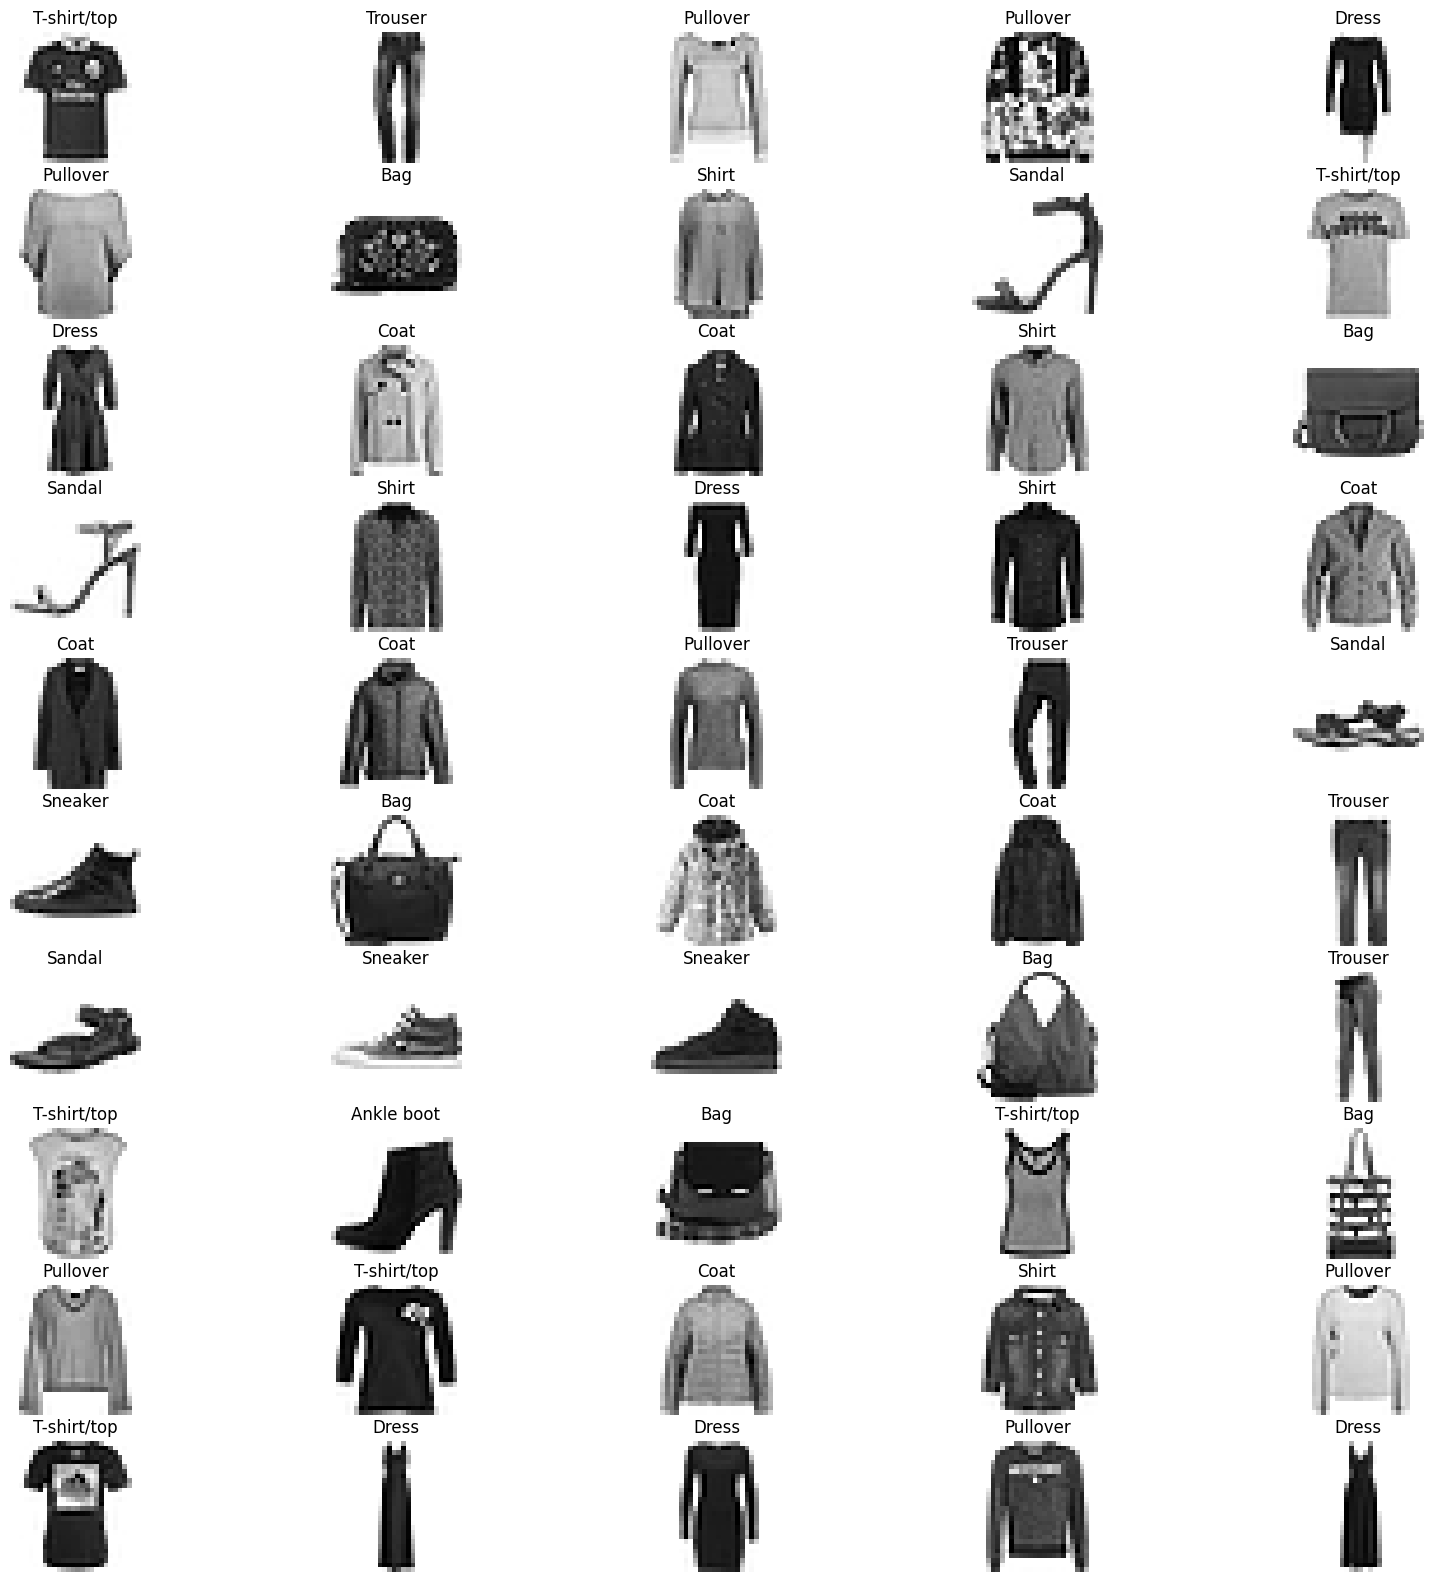

In [244]:
plt.figure(figsize=(20,20))
for i in range(0,50) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(images[i], cmap="gray_r")
    plt.title(labels[y[i]])

In [245]:
X_train, X_test, y_train, y_test = train_test_split(images, y.values, test_size=0.2)

In [246]:
class Rotate(tf.keras.layers.Layer):
  def call(self, inputs):
    return tf.keras.backend.permute_dimensions(inputs, pattern=(0, 2, 1))

def build_model(num_classes):
    input_ = Input(shape=(28, 28))

    x = Bidirectional(LSTM(15, return_sequences=True))(input_)
    x = Bidirectional(LSTM(15, return_sequences=True))(x)
    x1 = GlobalMaxPooling1D()(x)

    rotated_input = Rotate()(input_)
    x = Bidirectional(LSTM(15, return_sequences=True))(rotated_input)
    x = Bidirectional(LSTM(15, return_sequences=True))(x)
    x2 = GlobalMaxPooling1D()(x)

    x = tf.keras.layers.add([x1, x2])
    x = tf.keras.layers.Dense(512, 'relu')(x)
    output = tf.keras.layers.Dense(num_classes, 'softmax')(x)

    return tf.keras.models.Model(inputs=[input_], outputs=[output])

In [247]:
model = build_model(10)
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['accuracy'])

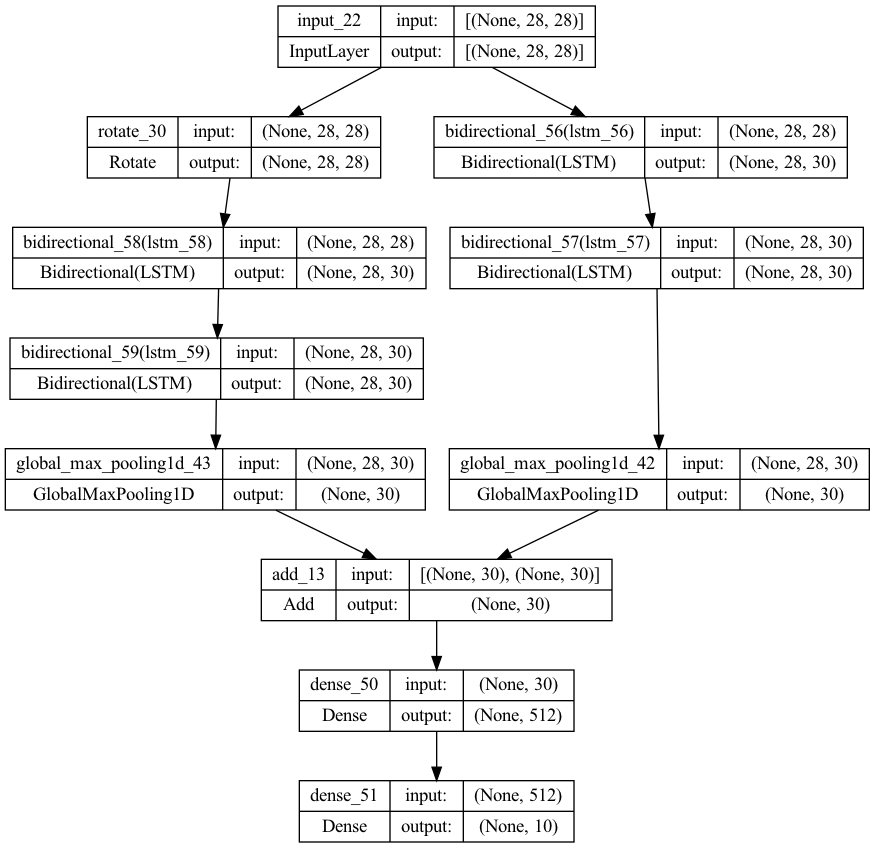

In [248]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [249]:
model.summary()

Model: "model_21"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_22 (InputLayer)          [(None, 28, 28)]     0           []                               
                                                                                                  
 rotate_30 (Rotate)             (None, 28, 28)       0           ['input_22[0][0]']               
                                                                                                  
 bidirectional_56 (Bidirectiona  (None, 28, 30)      5280        ['input_22[0][0]']               
 l)                                                                                               
                                                                                                  
 bidirectional_58 (Bidirectiona  (None, 28, 30)      5280        ['rotate_30[0][0]']       

In [250]:
model.fit(images, y, batch_size=32, epochs=10)

Epoch 1/10


2023-04-26 09:20:14.384381: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-26 09:20:15.107718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-26 09:20:15.113119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-26 09:20:15.183029: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-26 09:20:15.183310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-26 09:20:15.687174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-26 09:20:15.705369: I tensorflow/core/grappler/optimizers/cust

313/313 [==============================] - 39s 92ms/step - loss: 0.9559 - accuracy: 0.6463
Epoch 2/10
313/313 [==============================] - 23s 74ms/step - loss: 0.5898 - accuracy: 0.7758
Epoch 3/10
313/313 [==============================] - 23s 74ms/step - loss: 0.5274 - accuracy: 0.8042
Epoch 4/10
313/313 [==============================] - 24s 75ms/step - loss: 0.4874 - accuracy: 0.8220
Epoch 5/10
313/313 [==============================] - 23s 74ms/step - loss: 0.4529 - accuracy: 0.8332
Epoch 6/10
313/313 [==============================] - 24s 77ms/step - loss: 0.4280 - accuracy: 0.8436
Epoch 7/10
313/313 [==============================] - 25s 79ms/step - loss: 0.4139 - accuracy: 0.8471
Epoch 8/10
313/313 [==============================] - 23s 74ms/step - loss: 0.3893 - accuracy: 0.8569
Epoch 9/10
313/313 [==============================] - 23s 73ms/step - loss: 0.3782 - accuracy: 0.8588
Epoch 10/10
313/313 [==============================] - 23s 73ms/step - loss: 0.3609 - accurac

In [256]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
accuracy

0.8855000138282776

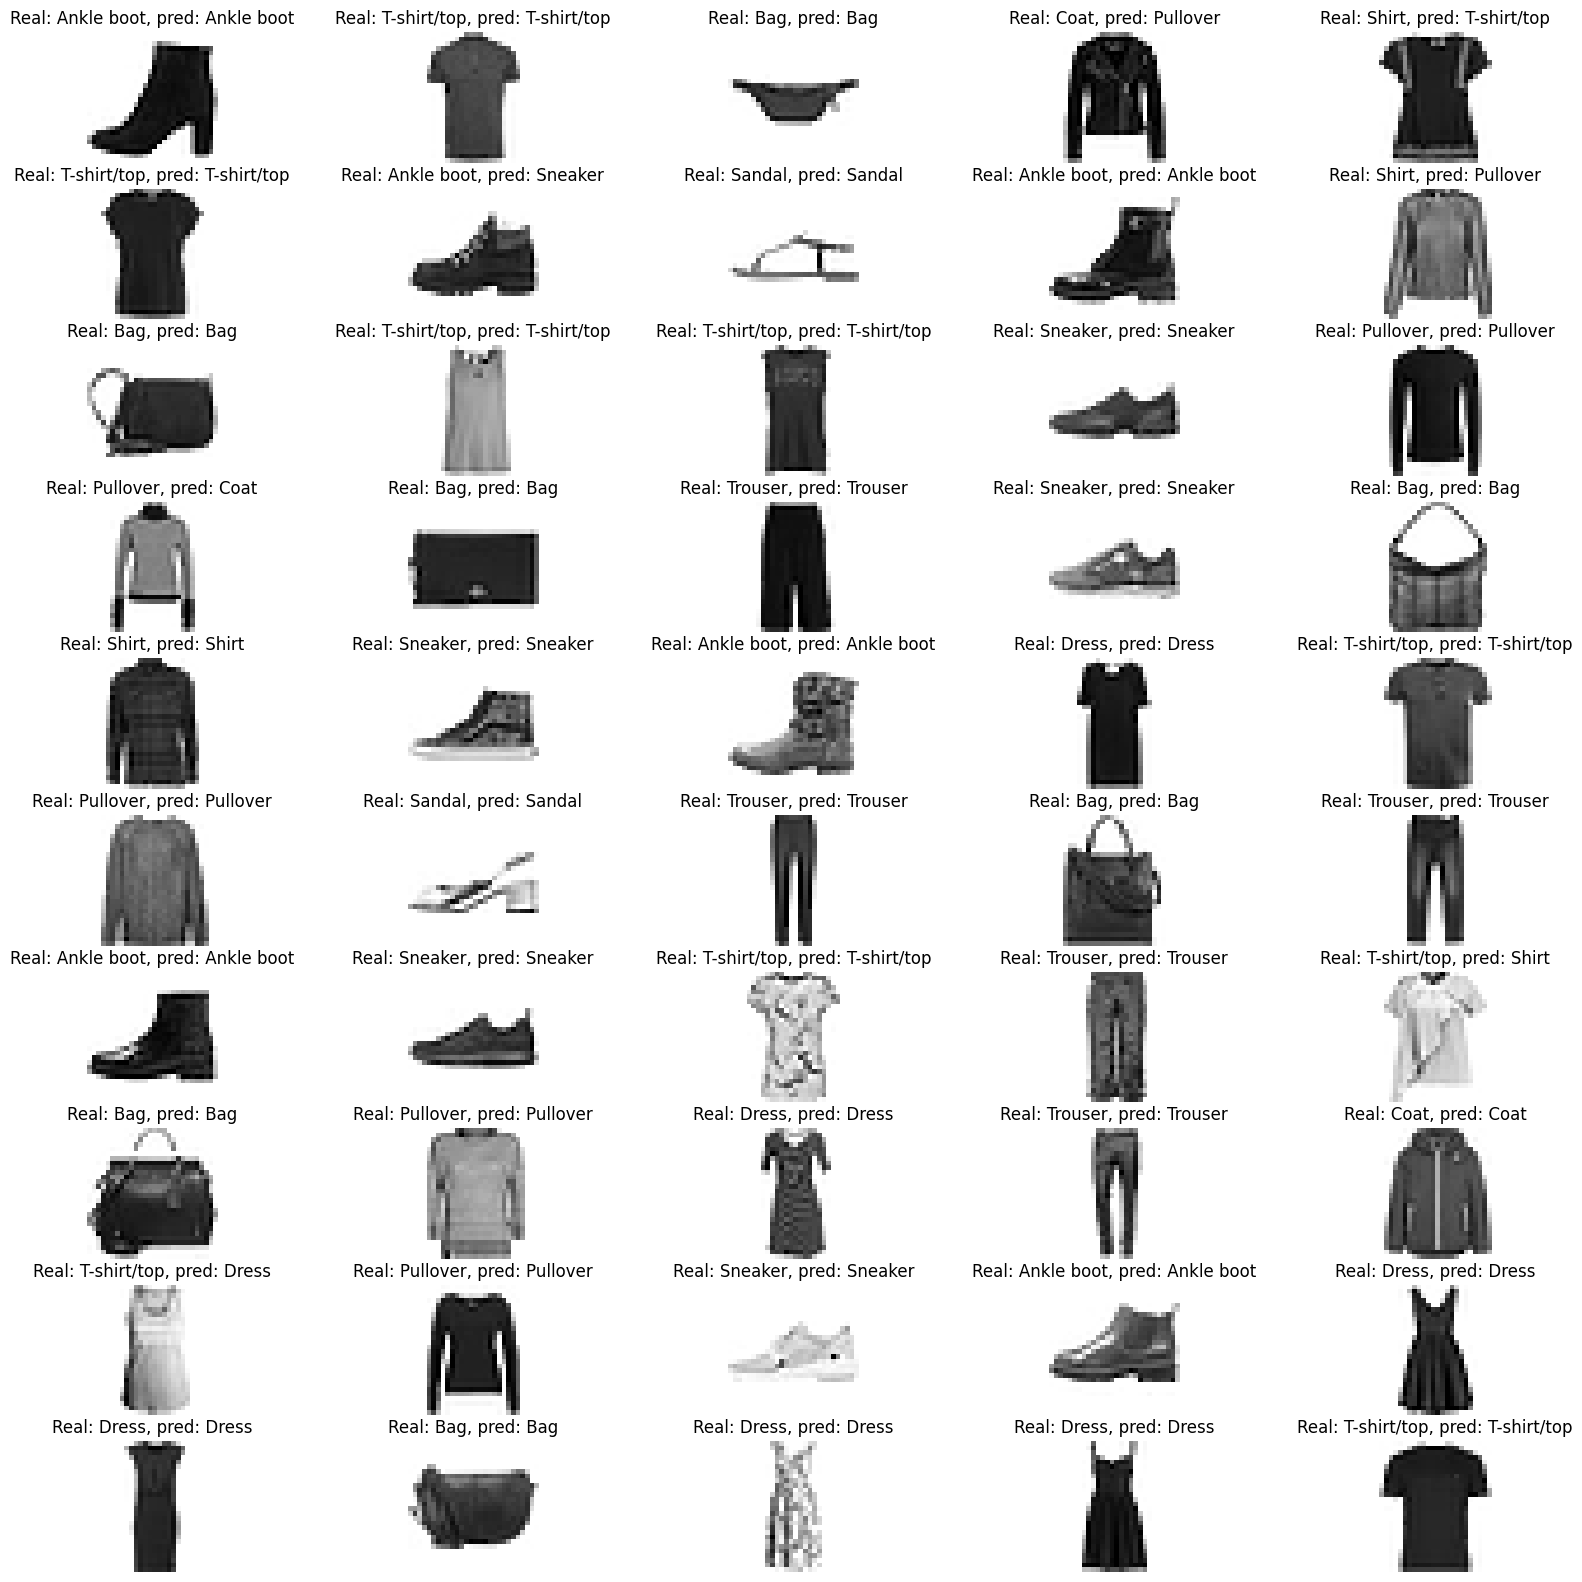

In [257]:
plt.figure(figsize=(20,20))
for i in range(0,50) :
    test_image = X_test[i]
    test_label = labels[y_test[i]]

    pred = model.predict(np.expand_dims(test_image, axis=0), verbose=0)[0]
    pred_idx = np.argmax(pred)
    pred_label = labels[pred_idx]

    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(test_image, cmap="gray_r")
    plt.title(f"Real: {test_label}, pred: {pred_label}")

In [263]:
predictions = []

for image, label_idx in zip(X_test, y_test):
    predicted = model.predict(np.expand_dims(image, axis=0), verbose=0)[0]
    pred_idx = np.argmax(predicted)
    predictions.append(pred_idx)

In [264]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions, num_classes=10)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[162,   0,   4,   8,   0,   1,  16,   0,   1,   0],
       [  0, 203,   1,   1,   0,   0,   1,   0,   0,   0],
       [  2,   0, 177,   3,  19,   0,  11,   0,   1,   0],
       [  4,   1,   2, 195,   4,   0,   2,   0,   1,   0],
       [  0,   0,  14,   8, 159,   0,  11,   0,   0,   0],
       [  0,   0,   0,   1,   0, 195,   0,   3,   0,   0],
       [ 38,   0,  19,  10,  12,   0, 130,   0,   1,   0],
       [  0,   0,   0,   0,   0,   8,   0, 179,   0,   5],
       [  0,   0,   3,   0,   1,   0,   0,   0, 186,   0],
       [  0,   0,   0,   0,   0,   3,   0,   9,   0, 185]], dtype=int32)>

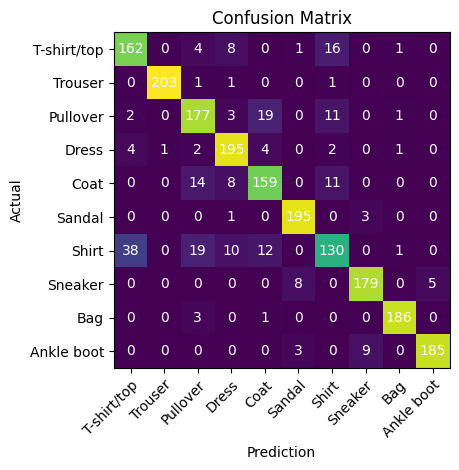

In [265]:
fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix.numpy())

ax.set_xticks(np.arange(len(labels)), labels=labels)
ax.set_yticks(np.arange(len(labels)), labels=labels)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, confusion_matrix.numpy()[i, j],
                       ha="center", va="center", color="w")

plt.xlabel('Prediction')
plt.ylabel('Actual')
ax.set_title("Confusion Matrix")
fig.tight_layout()
plt.show()